# TIME SERIES ANALYSIS
## Carlos Hinrichsen
### July 4$^{th}$, 2019

### Tasks:



1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. Download the **adjusted** close prices for INTC, HBC, AAPL and AMZN for the last 60 months.

3. Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. Do: 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. Do:
    - Combine all 4 time series (downloaded prices) into a single DataFrame,
    - Visualize the correlation between the stock prices of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

__Below you will find a series of neccesary steps in order to respond the questions addressed above:__

## 1. Import Required Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime
import matplotlib as mpl
import seaborn as sns
import numpy as np
from numpy import corrcoef, sum, log, arange
from pylab import pcolor, show, colorbar, xticks, yticks
plt.style.use('ggplot')

## 2. Import Datasets

First let's define the companies to extract the time series

In [2]:
# Apple, Amazon, HBC and Intel
data_label = ['AAPL', 'AMZN', 'HBC', 'INTC']

Now we need to extract for the previous 60 months. Because most of the analysis will be with prices of business month end, we will choose entire months. Therefore, the selected ending date is the last business day of June 2019

In [3]:
# Starting date, July 1, 2014
start = datetime.datetime(2014, 7, 1)
# Ending date, June 28, 2019
end = datetime.datetime(2019, 6, 28)

Now we will extract the information from `Yahoo`

In [4]:
# Extracting the information to a general object
Stocks_o = web.DataReader(data_label, 'yahoo', start, end)
# Then create a copy for further manipulation
Stocks = Stocks_o.copy()

## 3. Exploring the raw data set

We just want to understand the name and type of columns in the dataset, and if there are any NaN values. 

Additionally, we only need the `Adjusted Close` price, therefore any other information will be dropped.

### 3.1 Stocks

In [5]:
Stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-07-01 to 2019-06-28
Data columns (total 24 columns):
(High, AAPL)         1258 non-null float64
(High, AMZN)         1258 non-null float64
(High, HBC)          1240 non-null float64
(High, INTC)         1258 non-null float64
(Low, AAPL)          1258 non-null float64
(Low, AMZN)          1258 non-null float64
(Low, HBC)           1240 non-null float64
(Low, INTC)          1258 non-null float64
(Open, AAPL)         1258 non-null float64
(Open, AMZN)         1258 non-null float64
(Open, HBC)          1240 non-null float64
(Open, INTC)         1258 non-null float64
(Close, AAPL)        1258 non-null float64
(Close, AMZN)        1258 non-null float64
(Close, HBC)         1240 non-null float64
(Close, INTC)        1258 non-null float64
(Volume, AAPL)       1258 non-null float64
(Volume, AMZN)       1258 non-null float64
(Volume, HBC)        1240 non-null float64
(Volume, INTC)       1258 non-null float64
(Adj Close, AAP

We need to drop all columns that are not `Adj Close`:

In [6]:
Stocks = Stocks['Adj Close']
Stocks

Symbols,AAPL,AMZN,HBC,INTC
Date,,,,
2014-07-01,85.713371,332.390015,4420.270020,26.920374
2014-07-02,85.676704,332.850006,4499.200195,26.920374
2014-07-03,86.180794,337.489990,4736.000000,27.059410
2014-07-07,87.958870,333.549988,4683.379883,26.963825
2014-07-08,87.390602,323.809998,4841.250000,26.755278
2014-07-09,87.427269,329.970001,4946.490234,26.842171
2014-07-10,87.106491,327.920013,4788.629883,27.163687
2014-07-11,87.271454,346.200012,4841.250000,27.154999
2014-07-14,88.398788,355.320007,4841.250000,27.363548


Now let's look if there are any missing values

In [7]:
NAN_Stocks = len(Stocks) - Stocks.count()
NAN_Stocks

Symbols
AAPL     0
AMZN     0
HBC     18
INTC     0
dtype: int64

Therefore, we only have missing values in HBC (most of them at the end of 2019). We will deal with this problem in the following section.

### 3.2. NAN

The data used for this assignment is divided in two parts:

* Question 2 to 5: We will need to compute and analize the adjusted closed price of each month. So let's see if there is any missing values in this subset of the data

* Question 6: We will need to use all the downloaded prices to understand if there is a correlation of the prices between companies. In this case we will need to drop the NAN values of HBC, because otherwise we will not be able to compute the correlation with other companies. We will not be filling the missing values, to avoid the effects of this artificial filling. Additionally, the effects of not considering those observations should be low, because represents only 18 of 1258 observatios, $\approx 1.4\%$ 


Now let's subset the data into smaller datasets by company

### 3.3. Apple

In [8]:
Apple = Stocks.copy()
Apple = Apple['AAPL']
Apple.head()

Date
2014-07-01    85.713371
2014-07-02    85.676704
2014-07-03    86.180794
2014-07-07    87.958870
2014-07-08    87.390602
Name: AAPL, dtype: float64

### 3.4. Amazon

In [9]:
Amazon = Stocks.copy()
Amazon = Amazon['AMZN']
Amazon.head()

Date
2014-07-01    332.390015
2014-07-02    332.850006
2014-07-03    337.489990
2014-07-07    333.549988
2014-07-08    323.809998
Name: AMZN, dtype: float64

### 3.4. HBC

In [10]:
HBC = Stocks.copy()
HBC = HBC['HBC']
HBC.head()

Date
2014-07-01    4420.270020
2014-07-02    4499.200195
2014-07-03    4736.000000
2014-07-07    4683.379883
2014-07-08    4841.250000
Name: HBC, dtype: float64

### 3.5. Intel

In [11]:
Intel = Stocks.copy()
Intel = Intel['INTC']
Intel.head()

Date
2014-07-01    26.920374
2014-07-02    26.920374
2014-07-03    27.059410
2014-07-07    26.963825
2014-07-08    26.755278
Name: INTC, dtype: float64

## 4. Adjusted Close Prices for the end of the Business Month

### 4.1. Apple

In [12]:
# Business Month End Frequency
Apple_R = Apple.resample('BM').last()
Apple_R.tail()

Date
2019-02-28    172.485748
2019-03-29    189.221313
2019-04-30    199.900192
2019-05-31    175.070007
2019-06-28    197.919998
Freq: BM, Name: AAPL, dtype: float64

### 4.2. Amazon

In [13]:
# Business Month End Frequency
Amazon_R = Amazon.resample('BM').last()
Amazon_R.tail()

Date
2019-02-28    1639.829956
2019-03-29    1780.750000
2019-04-30    1926.520020
2019-05-31    1775.069946
2019-06-28    1893.630005
Freq: BM, Name: AMZN, dtype: float64

### 4.3. HBC

In [14]:
# Business Month End Frequency
HBC_R = HBC.resample('BM').last()
HBC_R.tail()

Date
2019-02-28    18619.000000
2019-03-29    17857.099609
2019-04-30    16666.699219
2019-05-31    16150.000000
2019-06-28    14950.000000
Freq: BM, Name: HBC, dtype: float64

Let's review if there is any NaN values:

In [15]:
NAN_HBC_R = len(HBC_R) - HBC_R.count()
NAN_HBC_R

0

### 4.4. Intel

In [16]:
# Business Month End Frequency
Intel_R = Intel.resample('BM').last()
Intel_R.tail()

Date
2019-02-28    52.637634
2019-03-29    53.373131
2019-04-30    50.729324
2019-05-31    44.040001
2019-06-28    47.869999
Freq: BM, Name: INTC, dtype: float64

### 4.5. Plotting

We will finish this section plotting the resamples:

C:\Users\Carlos Hinrichsen\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Stock Price')

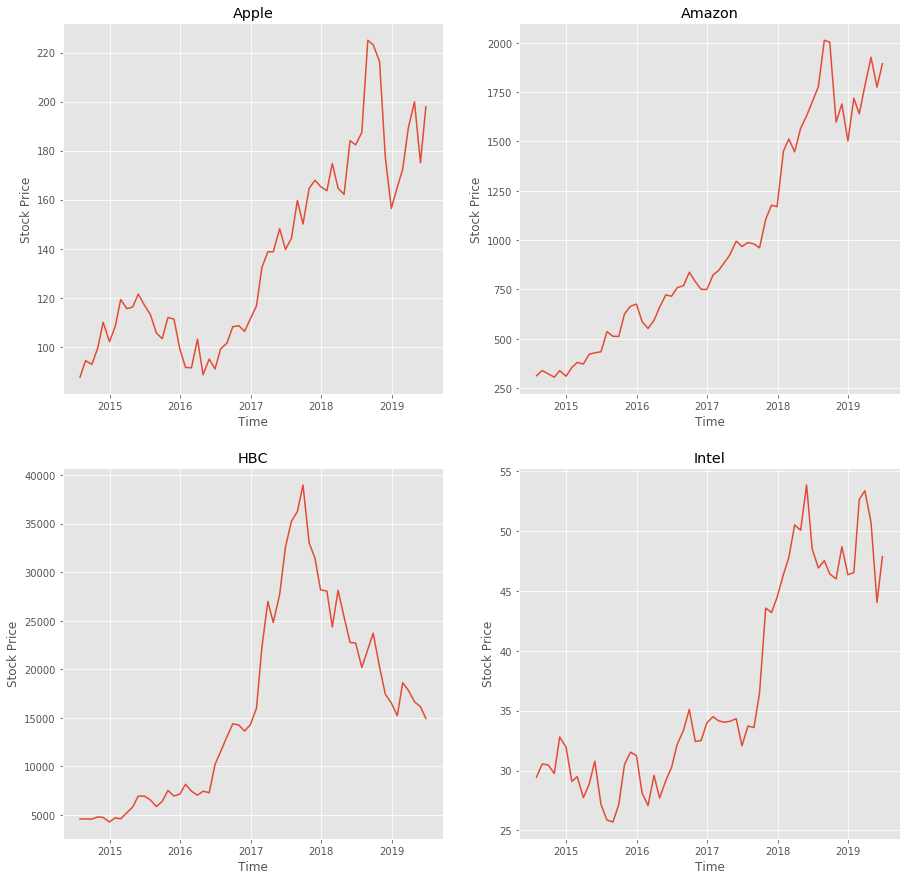

In [17]:
plt.rc('figure', figsize=(15, 15))

plt.subplot(2,2,1)
plt.plot(Apple_R)
plt.title("Apple")
plt.xlabel("Time")
plt.ylabel("Stock Price")

plt.subplot(2,2,2)
plt.plot(Amazon_R)
plt.title("Amazon")
plt.xlabel("Time")
plt.ylabel("Stock Price")

plt.subplot(2,2,3)
plt.plot(HBC_R)
plt.title("HBC")
plt.xlabel("Time")
plt.ylabel("Stock Price")

plt.subplot(2,2,4)
plt.plot(Intel_R)
plt.title("Intel")
plt.xlabel("Time")
plt.ylabel("Stock Price")

We can notice that all the plots except `HBC` have a similar trends. We will come back to this analysis later. 

## 5. Autocorrelation Adjusted Close Prices for the end of the Business Month

### 5.1. Apple

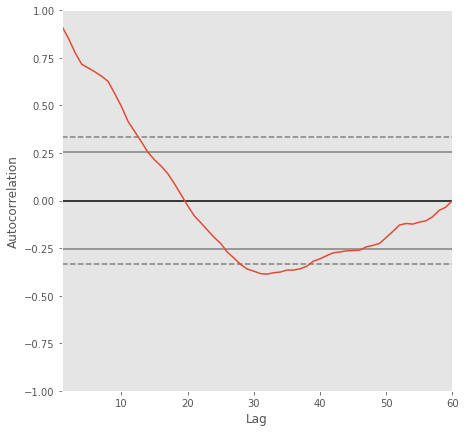

In [18]:
plt.rc('figure', figsize=(7, 7))
pd.plotting.autocorrelation_plot(Apple_R)

We can notice that the autocorrelation is very high within the first lags, and then pass through the confidence interval lying after to a zone with negative autocorrelation. This makes sense, because in a monthly basis we can expect that some inertia should exist from one, two, three, and several months to another months. 

In the long term this effect decreases, as we can see in the autocorrelation plot.

__We need to do further analysis, but overall we can say that we are under the presence of autocorrelation in all 4 stock prices (please review the same behavior in the plots below).__

### 5.2. Amazon

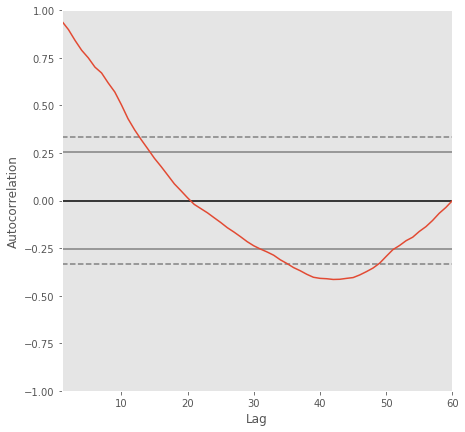

In [19]:
plt.rc('figure', figsize=(7, 7))
pd.plotting.autocorrelation_plot(Amazon_R)

We visualize the same effect explained in Apple prices. Therefore, there is autocorrelation.

### 5.3. HBC

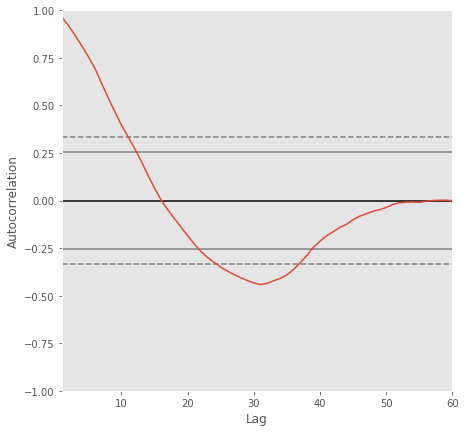

In [20]:
plt.rc('figure', figsize=(7, 7))
pd.plotting.autocorrelation_plot(HBC_R)

We visualize the same effect explained in Apple and Amazon prices. Therefore, there is autocorrelation.

### 5.4. Intel

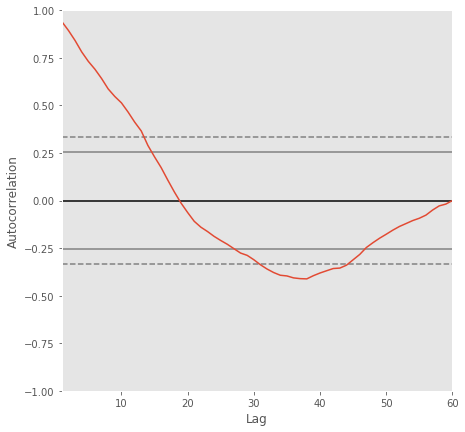

In [21]:
plt.rc('figure', figsize=(7, 7))
pd.plotting.autocorrelation_plot(Intel_R)

We visualize the same effect explained in Apple, Amazon and HBC prices. Therefore, there is autocorrelation.

## 6. Monthly Returns Adjusted Close Prices for the end of the Business Month

We will use the datasets already created by company to perform the monthly returns (`Apple_R`,`Amazon_R`,`HBC_R` and `Intel_R`):

In [22]:
# The shift is one period, basically because we already have the months information

# Apple
Apple_S = Apple_R/Apple_R.shift(1)-1

# Amazon
Amazon_S = Amazon_R/Amazon_R.shift(1)-1

# HBC
HBC_S = HBC_R/HBC_R.shift(1)-1

# Intel
Intel_S = Intel_R/Intel_R.shift(1)-1

Because of the shift, the first row would have NaN. We will remove them now:

In [23]:
Apple_S = Apple_S.dropna(axis='rows')
Amazon_S = Amazon_S.dropna(axis='rows')
HBC_S = HBC_S.dropna(axis='rows')
Intel_S = Intel_S.dropna(axis='rows')

### 6.4. Autocorrelation Plots

#### 6.4.1. Apple

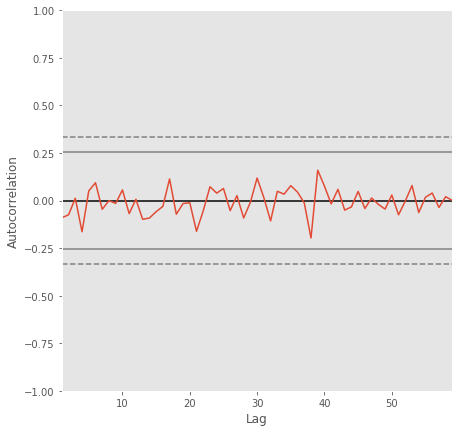

In [24]:
plt.rc('figure', figsize=(7, 7))
pd.plotting.autocorrelation_plot(Apple_S)

__We can conclude that there is no presence of autocorrelation. In fact the autocorrelation is always between the confidence intervals.__

__This means that the monthly returns are random, and there is no relation in time.__

#### 6.4.2. Amazon

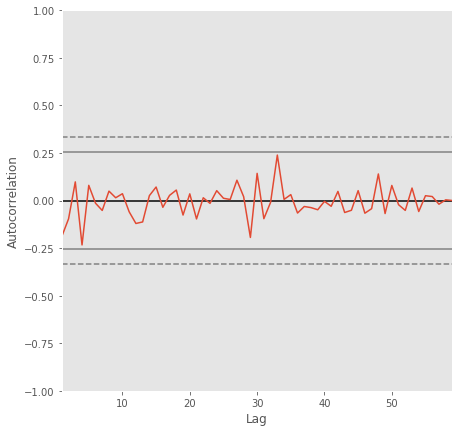

In [25]:
plt.rc('figure', figsize=(7, 7))
pd.plotting.autocorrelation_plot(Amazon_S)

__Like the case of Apple, we can conclude that there is no presence of autocorrelation. In fact the autocorrelation is always between the confidence intervals.__

#### 6.4.3. HBC

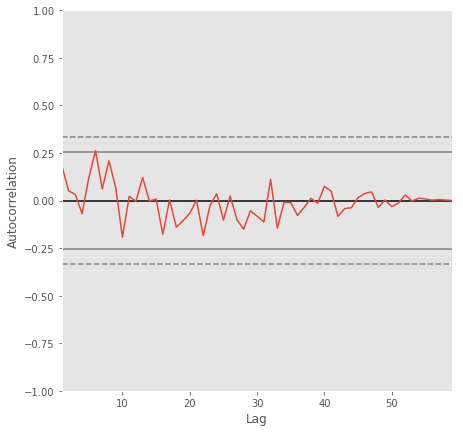

In [26]:
plt.rc('figure', figsize=(7, 7))
pd.plotting.autocorrelation_plot(HBC_S)

__Like the case of Apple and Amazon, we can conclude that there is no presence of autocorrelation (there is just one point over the interval). In fact the autocorrelation is always between the confidence intervals.__

#### 6.4.4. Intel

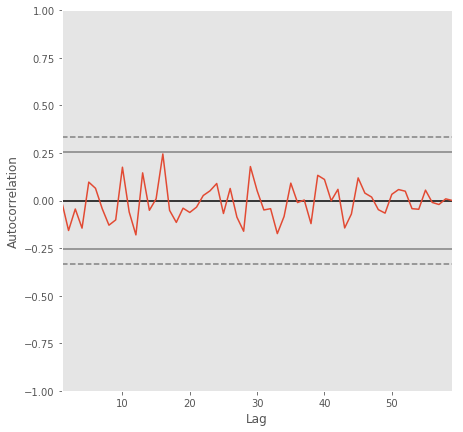

In [27]:
plt.rc('figure', figsize=(7, 7))
pd.plotting.autocorrelation_plot(Intel_S)

__Like the case of Apple, Amazon and HBC, we can conclude that there is no presence of autocorrelation. In fact the autocorrelation is always between the confidence intervals.__

## 7. Correlation Plot between the stock prices of all pairs of stocks

For this part we will need all the prices, therefore we need to to have the whole dataset:

In [28]:
Stocks_o.head()

Attributes       High                                            Low  \
Symbols          AAPL        AMZN          HBC       INTC       AAPL   
Date                                                                   
2014-07-01  94.070000  333.200012  4446.580078  31.090000  93.129997   
2014-07-02  94.059998  336.760010  4551.830078  31.049999  93.089996   
2014-07-03  94.099998  338.299988  4788.629883  31.360001  93.199997   
2014-07-07  95.989998  337.549988  4788.629883  31.200001  94.099998   
2014-07-08  96.800003  333.739990  4920.180176  31.080000  93.919998   

Attributes                                           Open              ...  \
Symbols           AMZN          HBC       INTC       AAPL        AMZN  ...   
Date                                                                   ...   
2014-07-01  325.100006  4393.959961  30.870001  93.519997  325.859985  ...   
2014-07-02  331.660004  4393.959961  30.799999  93.870003  333.200012  ...   
2014-07-03  333.079987  4499.200195  31.020000  93.669998  334.829987  ...   
2014-07-07  332.519989  4683.379883  30.920000  94.139999  337.500000  ...   
2014-07-08  321.399994  4604.450195  30.700001  96.269997  333.100006  ...   

Attributes        Close                 Volume                        \
Symbols             HBC       INTC        AAPL       AMZN        HBC   
Date                                                                   
2014-07-01  4420.270020  30.980000  38223000.0  3173600.0   932533.0   
2014-07-02  4499.200195  30.980000  28465000.0  2681300.0  1451515.0   
2014-07-03  4736.000000  31.139999  22891800.0  1944300.0  5483077.0   
2014-07-07  4683.379883  31.030001  56468000.0  2128900.0  1581118.0   
2014-07-08  4841.250000  30.790001  65222000.0  4271600.0  2989190.0   

Attributes              Adj Close                                      
Symbols           INTC       AAPL        AMZN          HBC       INTC  
Date                                                                   
2014-07-01  28240000.0  85.713371  332.390015  4420.270020  26.920374  
2014-07-02  16831200.0  85.676704  332.850006  4499.200195  26.920374  
2014-07-03  20437600.0  86.180794  337.489990  4736.000000  27.059410  
2014-07-07  22233400.0  87.958870  333.549988  4683.379883  26.963825  
2014-07-08  37608700.0  87.390602  323.809998  4841.250000  26.755278  

[5 rows x 24 columns]

Due to the explanation provided before, we will drop all row with NaN values (subject to `HBC`):

In [29]:
Stocks_o = Stocks_o.dropna(axis='rows')
Stocks_o.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1240 entries, 2014-07-01 to 2019-06-27
Data columns (total 24 columns):
(High, AAPL)         1240 non-null float64
(High, AMZN)         1240 non-null float64
(High, HBC)          1240 non-null float64
(High, INTC)         1240 non-null float64
(Low, AAPL)          1240 non-null float64
(Low, AMZN)          1240 non-null float64
(Low, HBC)           1240 non-null float64
(Low, INTC)          1240 non-null float64
(Open, AAPL)         1240 non-null float64
(Open, AMZN)         1240 non-null float64
(Open, HBC)          1240 non-null float64
(Open, INTC)         1240 non-null float64
(Close, AAPL)        1240 non-null float64
(Close, AMZN)        1240 non-null float64
(Close, HBC)         1240 non-null float64
(Close, INTC)        1240 non-null float64
(Volume, AAPL)       1240 non-null float64
(Volume, AMZN)       1240 non-null float64
(Volume, HBC)        1240 non-null float64
(Volume, INTC)       1240 non-null float64
(Adj Close, AAP

### 7.1. `Adj Close`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C87C400>,
      dtype=object)

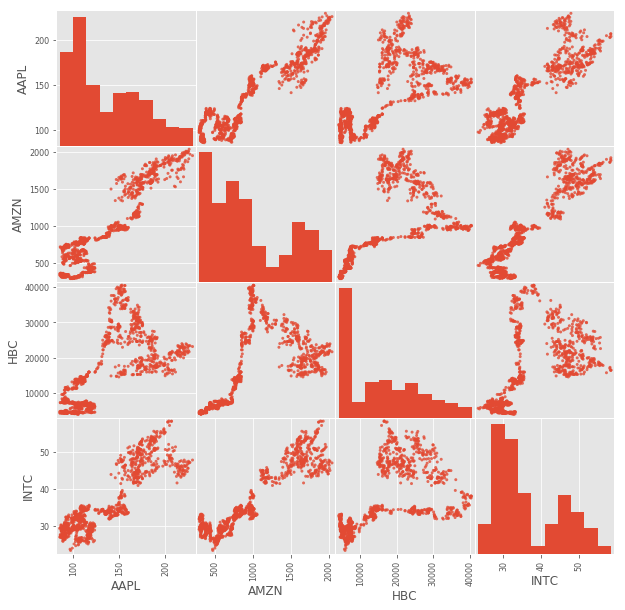

In [30]:
plt.rc('figure', figsize=(10, 10))
pd.plotting.scatter_matrix(Stocks_o['Adj Close'], alpha=0.8)

In the scatterplot graphs we can see that all companies except `HBC` has very similar relations.

Let´s plot a correlation matrix plot to understand these relations:

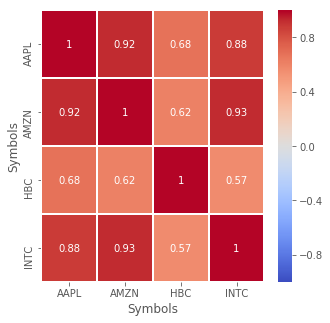

In [31]:
plt.rc('figure', figsize=(5, 5))
sns.heatmap(Stocks_o['Adj Close'].corr().round(4), annot=True,linewidths=1.0,vmin=-1,vmax=1,cmap="coolwarm")

Now we can see that Apple, Amazon and Intel have a higher positive relationship (correlation) between each prices, and HBC doesn't have the same performance.

__The explanation is simple. In financial risk, there are two main kind of risks:__

* Systematic risk: Unique to a specific company or industry.
* Non Systematic risk: Inherent in the market

__The companies `Apple`, `Amazon` and `Intel` are in the same industry, therefore the have simlar Systematic Risk (besides the Market Risk, or Non Systematic). For this reason it's easy to understand that they tend to move in the same direction in time.__

__`HBC` doesn't have the same Systematic Risk, and that is the reason why the company prices doesn't move completely the same way as the other companies.__

Now let's do the analysis with the other prices:

### 7.2. `Open`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D3357F0>,
      dtype=object)

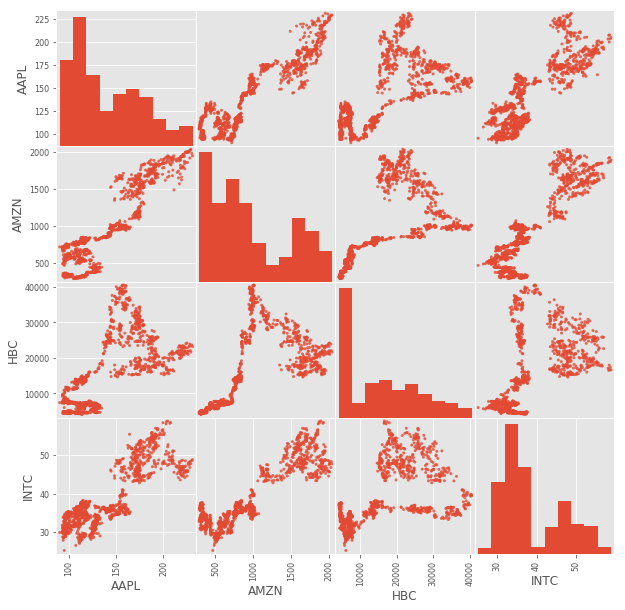

In [32]:
plt.rc('figure', figsize=(10, 10))
pd.plotting.scatter_matrix(Stocks_o['Open'], alpha=0.8)

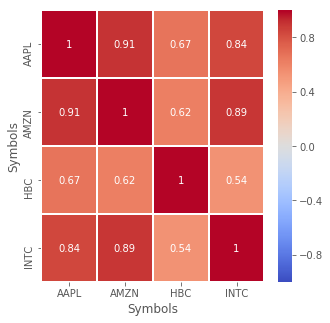

In [33]:
plt.rc('figure', figsize=(5, 5))
sns.heatmap(Stocks_o['Open'].corr().round(4), annot=True,linewidths=1.0,vmin=-1,vmax=1,cmap="coolwarm")

__With this price we get the same conclusion__

### 7.3. `Close`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F538550>,
      dtype=object)

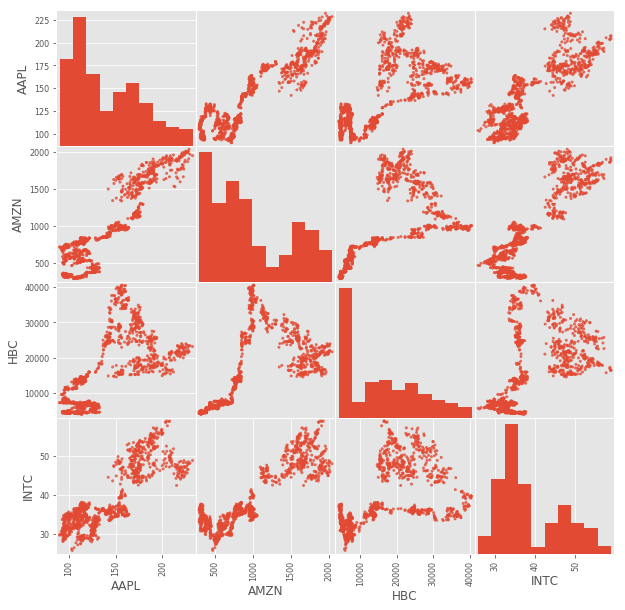

In [34]:
plt.rc('figure', figsize=(10, 10))
pd.plotting.scatter_matrix(Stocks_o['Close'], alpha=0.8)

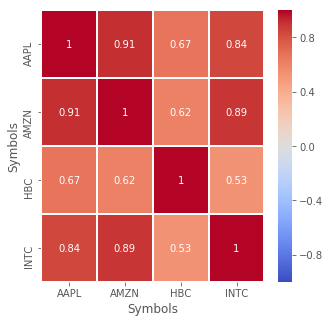

In [35]:
plt.rc('figure', figsize=(5, 5))
sns.heatmap(Stocks_o['Close'].corr().round(4), annot=True,linewidths=1.0,vmin=-1,vmax=1,cmap="coolwarm")

__With this price we get the same conclusion__

### 7.4. `High`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FBD1550>,
      dtype=object)

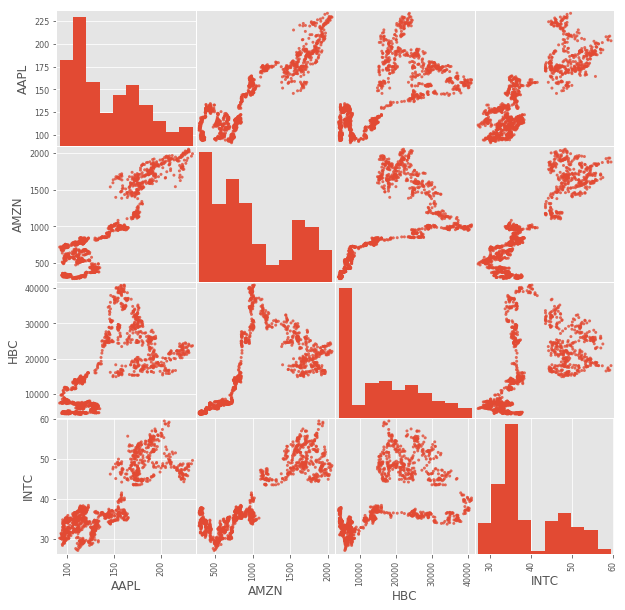

In [36]:
plt.rc('figure', figsize=(10, 10))
pd.plotting.scatter_matrix(Stocks_o['High'], alpha=0.8)

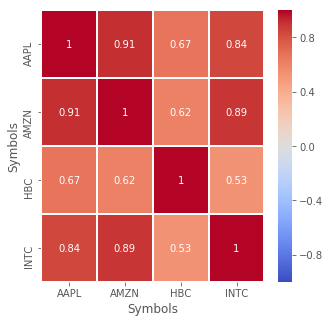

In [37]:
plt.rc('figure', figsize=(5, 5))
sns.heatmap(Stocks_o['High'].corr().round(4), annot=True,linewidths=1.0,vmin=-1,vmax=1,cmap="coolwarm")

__With this price we get the same conclusion__

### 7.5. `Low`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001029A320>,
      dtype=object)

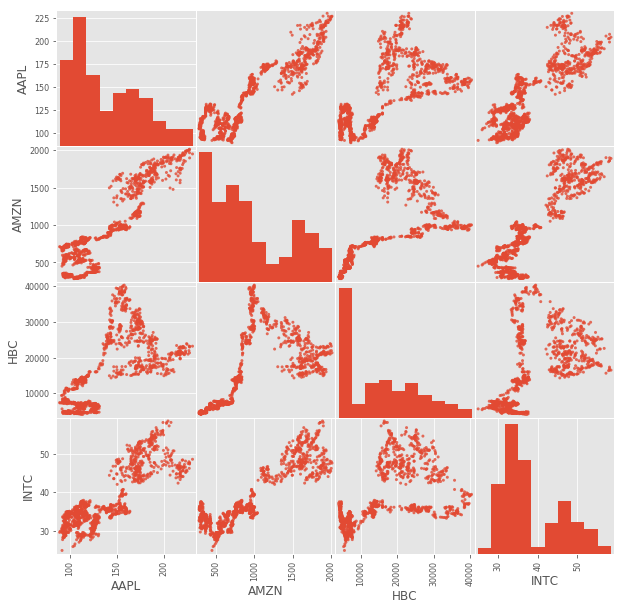

In [38]:
plt.rc('figure', figsize=(10, 10))
pd.plotting.scatter_matrix(Stocks_o['Low'], alpha=0.8)

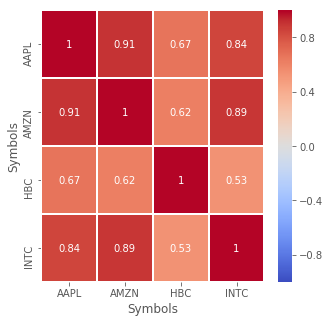

In [39]:
plt.rc('figure', figsize=(5, 5))
sns.heatmap(Stocks_o['Low'].corr().round(4), annot=True,linewidths=1.0,vmin=-1,vmax=1,cmap="coolwarm")

__With this price we get the same conclusion__